## PCAしたデータを階層的クラスタリング
---
### Method: Euclidean distance or Cosine similarity

In [1]:
#Import library

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Set Config
CONFIG = {
  "file": "PCAed_data.csv",
}

In [3]:
#Load Data
df = pd.read_csv(CONFIG["file"], index_col=0)

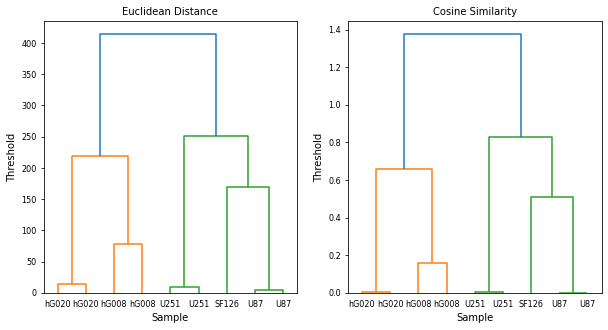

In [4]:
xe = linkage(df, metric="euclidean", method="ward")

figure = plt.figure(figsize=(10, 5))
figure.add_subplot(1, 2, 1)
dendrogram(xe, labels=df.index)
plt.title('Euclidean Distance', size=10)
plt.xlabel('Sample', size=10)
plt.ylabel('Threshold', size=10)
plt.tick_params(labelsize=8)

xc = linkage(df, metric="cosine", method="single")

figure.add_subplot(1, 2, 2)
dendrogram(xc, labels=df.index)
plt.title('Cosine Similarity', size=10)
plt.xlabel('Sample', size=10)
plt.ylabel('Threshold', size=10)
plt.tick_params(labelsize=8)
plt.show()

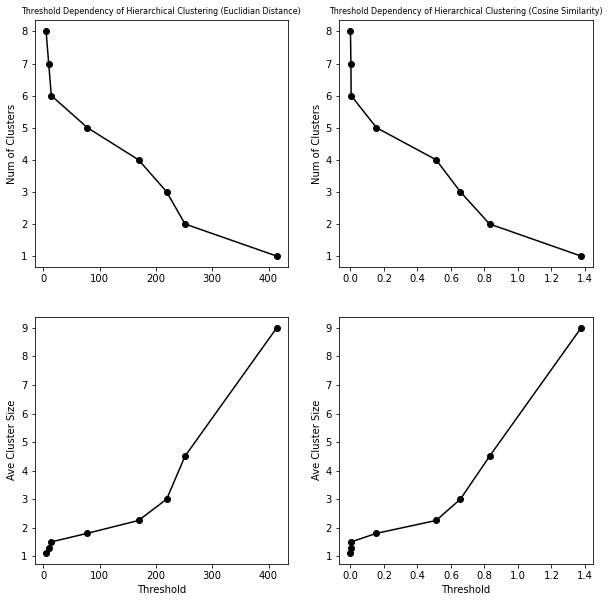

In [5]:
ncd=len(df)
nsd=len(df)
df1=pd.DataFrame(xe)

x1=[]
y1=[]
x2=[]
y2=[]
for i in df1.index:
    n1=int(df1.iloc[i][0])
    n2=int(df1.iloc[i][1])
    val=df1.iloc[i][2]
    ncd -= 1
    x1.append(val)
    x2.append(val)
    y1.append(ncd)
    y2.append(float(nsd)/float(ncd))
figure=plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, 'ko-')
plt.title('Threshold Dependency of Hierarchical Clustering (Euclidian Distance)', size=8)
plt.ylabel('Num of Clusters')
plt.subplot(2, 2, 3)
plt.plot(x2, y2, 'ko-')
plt.xlabel('Threshold')
plt.ylabel('Ave Cluster Size')

ncd=len(df)
nsd=len(df)
df1=pd.DataFrame(xc)

x1=[]
y1=[]
x2=[]
y2=[]
for i in df1.index:
    n1=int(df1.iloc[i][0])
    n2=int(df1.iloc[i][1])
    val=df1.iloc[i][2]
    ncd -= 1
    x1.append(val)
    x2.append(val)
    y1.append(ncd)
    y2.append(float(nsd)/float(ncd))
plt.subplot(2, 2, 2)
plt.plot(x1, y1, 'ko-')
plt.title('Threshold Dependency of Hierarchical Clustering (Cosine Similarity)', size=8)
plt.ylabel('Num of Clusters')
plt.subplot(2, 2, 4)
plt.plot(x2, y2, 'ko-')
plt.xlabel('Threshold')
plt.ylabel('Ave Cluster Size')
plt.show()